In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

#path_to_csv_annotations = "C:/Users/margauxf/Dropbox/PhD/2023/1-AnnChor1000-Reviewed-CSVsOnly"
#path_to_json_skeletons = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON"

In [2]:
#Kitri variation has good examples of ExhappeSecond
#specify which class's segments you are looking for...
def getSingleVideoSegments(VID, csv_path, cls):
    try:
        lines = open(path_to_CSV,'r').readlines()[2:]
    except Exception as e:
        print(e)
        exit(1)
    frame_st_et_list = []
    for line in lines:
        try:
            l=line.split(",")
            vid_ID = l[1].split('\\\\')[3].replace('"','')[:-5]
            #determine the kind of label:
            lab = l[4].replace('"','')
            lab = lab.strip("{}\n").split(":") #lab[0] is 'OnlyOneDancer?' or 'BalletSteps'
            #print(lab[0])
            cl=0
            onlyOne=0
            if lab[0].lower() == 'OnlyOneDancer?'.lower(): # Check if it's a onlyOne flag
                onlyOne = int(lab[1])
                continue #skip these
            elif int(lab[1])==19: #skip the backwards annotations for now
                continue
            elif lab[0].lower() == 'BalletSteps'.lower():
                cl = int(lab[1]) #otherwise it's a ballet step class label
            
            if(vid_ID == VID): # look for our video of interest:
                #print(l)
                
                if cl == cls: # if it is an extensionDerriereRight segment:
                    print(vid_ID)
                    print("class: ", cl)
                    print("start: ", l[2])
                    print("end: ", l[3])
                    st = float(l[2])
                    et = float(l[3])
                    #calculate the frame numbers for 25 fps video:
                    st_frame = round(st*25)
                    et_frame = round(et*25)
                    segment_fr = [cl,st_frame, et_frame]
                    print(segment_fr)
                    frame_st_et_list.append(segment_fr)
    
        except Exception as e:
            print(e)
    print("frame_st_et_list: ", frame_st_et_list)
    return frame_st_et_list

#path_to_CSV = "C:/Users/margauxf/Dropbox/PhD/2023-OpenPose-Work/Samples/GIS.csv"
path_to_CSV = "C:/Users/margauxf/Dropbox/PhD/2023/1-AnnChor1000-Reviewed-CSVsOnly/KIT.csv"
frame_segments_ls = getSingleVideoSegments("KIT0001",path_to_CSV, 3)

KIT0001
class:  3
start:  20.777
end:  21.617
[3, 519, 540]
KIT0001
class:  3
start:  21.597
end:  22.657
[3, 540, 566]
KIT0001
class:  3
start:  22.657
end:  23.877
[3, 566, 597]
KIT0001
class:  3
start:  27.407
end:  28.207
[3, 685, 705]
KIT0001
class:  3
start:  28.207
end:  29.147
[3, 705, 729]
KIT0001
class:  3
start:  29.147
end:  29.947
[3, 729, 749]
KIT0001
class:  3
start:  29.947
end:  30.867
[3, 749, 772]
KIT0001
class:  3
start:  34.138
end:  35.138
[3, 853, 878]
KIT0001
class:  3
start:  35.138
end:  36.558
[3, 878, 914]
frame_st_et_list:  [[3, 519, 540], [3, 540, 566], [3, 566, 597], [3, 685, 705], [3, 705, 729], [3, 729, 749], [3, 749, 772], [3, 853, 878], [3, 878, 914]]


num_colours 30
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000519_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000520_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000521_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000522_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000523_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000524_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000525_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000526_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000527_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000528_keypoints.json
C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000529_keypoints.json
C:/Use

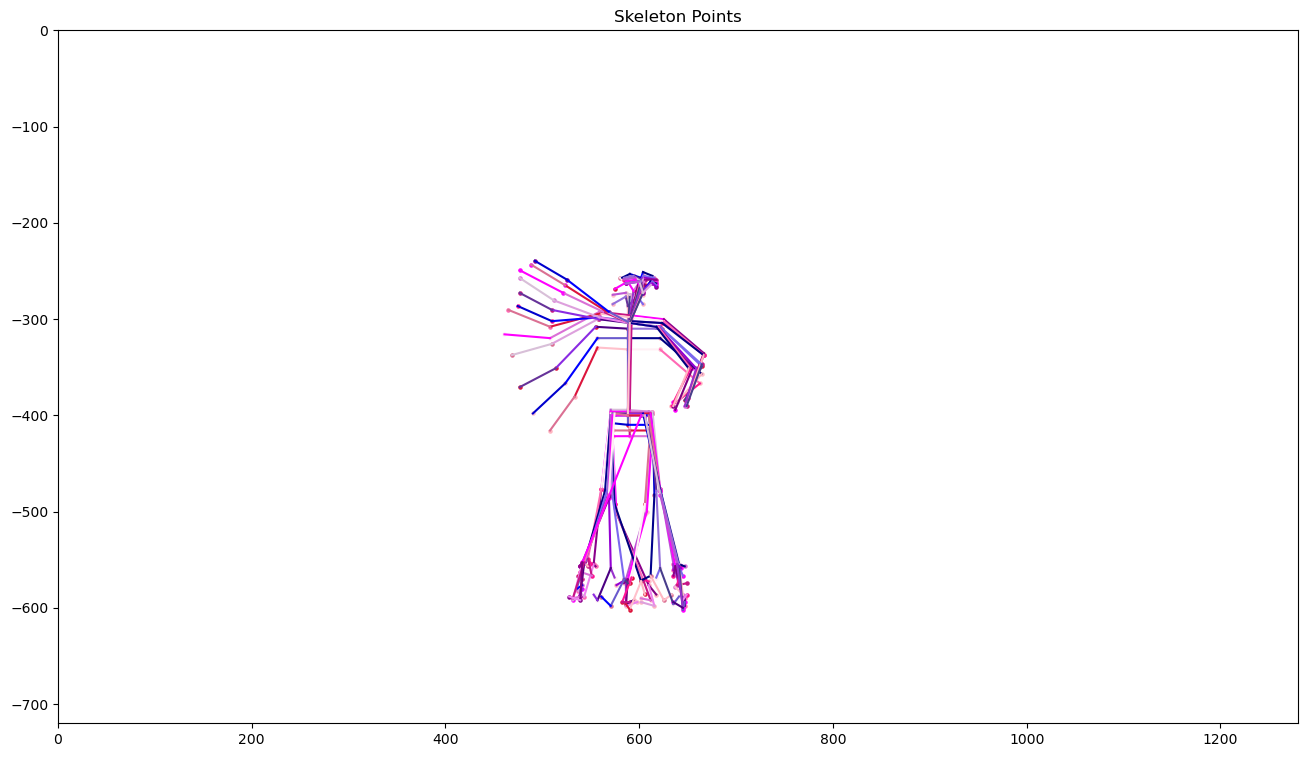

In [3]:
#Get the json files for the segments we have now...

path_to_JSON = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON"

# GIS0004_000000000169_keypoints.json - 12 placeholders
def plot_segment_skeleton_points(start_frame, end_frame, vid_ID):
    bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
    penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
    print("num_colours",len(penColor))
    fig, ax = plt.subplots(1, figsize=(16,9))
    ax.set_prop_cycle('color',penColor)
    plt.title('Skeleton Points')
    plt.xlim(0, 1280)
    plt.ylim(-720, 0)
        
    st_file_name = vid_ID +"_"+str(start_frame).rjust(12, '0') +"_keypoints.json"
    # startf = 5   end = 9... 9-5 = 4 for i in range(4+1) -> 0,1,2,3,4
    iter_count = end_frame - start_frame
    for i in range(iter_count+1):
        json_file_num = start_frame + i
        json_file_name = vid_ID +"_"+str(json_file_num).rjust(12, '0') +"_keypoints.json"
        json_file_path = path_to_JSON+"/"+vid_ID+"/"+json_file_name
        print(json_file_path)
        img_json = pd.read_json(json_file_path)
        keypoints = img_json.people[0]['pose_keypoints_2d']
        #print(keypoints)
        x = keypoints[0::3]
        yorig = keypoints[1::3]
        corig = keypoints[2::3]
        y = [-y for y in yorig]
        sc = ax.scatter(x,y, s=5)
        for bone in bones:
            if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                continue
                
            ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]])

plot_segment_skeleton_points(519, 530,"KIT0001") #start to end -> fifth to fifth sample 519-540


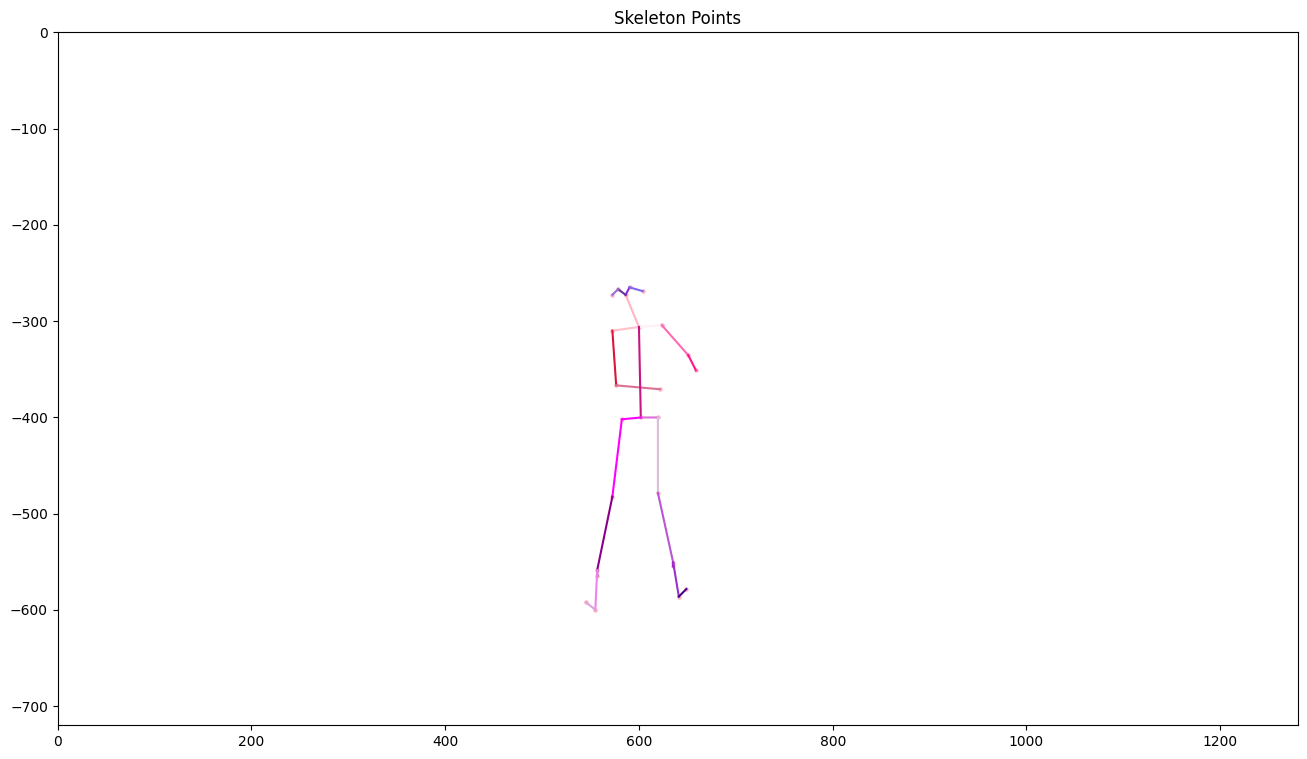

In [12]:
#Plot a single sample frame
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
fig, ax = plt.subplots(1, figsize=(16,9))
ax.set_prop_cycle('color',penColor)
plt.title('Skeleton Points')
plt.xlim(0, 1280)
plt.ylim(-720, 0)


#ToComment
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000529_keypoints.json"
sample_json_file_pth = "/Users/margauxbowditch/Dropbox/PhD/Last_Visuals/KIT0001/KIT0001_000000000573_keypoints.json" #Macbook
img_json = pd.read_json(sample_json_file_pth)
keypoints = img_json.people[0]['pose_keypoints_2d']
#print(keypoints)
x = keypoints[0::3]
yorig = keypoints[1::3]
corig = keypoints[2::3]
y = [-y for y in yorig]
sc = ax.scatter(x,y, s=5)
for bone in bones:
    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
        continue
    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]])
#toComment

In [5]:
import math
#Helper method
def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

#Helper method
def getLowestFootCoordIndex(y_arr):
    #find the "lowest" foot coordinate. We'll look at y values 22,23,19,20 (toes) 11,24,21,14 (ankles/heels)
    foot_indices = [11,14,19,20,21,22,23,24]
    max_foot_y = 0
    max_foot_index = 0
    for i in foot_indices:
        #print(f"footindex:{i}: {y_arr[i]}")
        if y_arr[i] > max_foot_y:
            max_foot_y = y_arr[i]
            max_foot_index=i
    #print(f"'lowest' foot y value: {max_foot_y}")
    return max_foot_index

#Helper method
def isLorR(index):
    #RHeel:24 RAnkle:11 RBigToe:22 RSmallToe:23
    #LHeel:21 LAnkle:14 LBigToe:19 LSmallToe:20
    R_arr=[24,11,22,23]
    L_arr=[21,14,19,20]
    toReturn = "None"
    for r in R_arr:
        if index == r:
            toReturn = 'right'
    for l in L_arr:
        if index == l:
            toReturn = 'left'
    #print(toReturn)
    return toReturn

In [6]:
def establish_stave_lines(file_path):
    #print("Stave lines:")
    img_json = pd.read_json(file_path)
    keypoints = img_json.people[0]['pose_keypoints_2d']
    #print(keypoints)
    x_arr = keypoints[0::3]
    y_arr = keypoints[1::3]
    #print("X-coords:",x_arr)
    #print(len(x_arr))
    #print("Y-coords:",y_arr)
    #print(len(y_arr))
    #We know for the start frame for echappe second, the head/eyes are the highest points, feet are the lowest points
    # find the top of head line, find the below the feet line:
    #find the distance between the nose and the base of the neck, Coords 0 and 1
    nose_neck_dist = calculate_distance(x_arr[0], y_arr[0],x_arr[1],y_arr[1])
    #print("Nose-Neck-Distance: ", nose_neck_dist )
    nose_tophead_dist = 0.75*nose_neck_dist #we estimate the distance to the top of head to be 3/4 of neck-nose distance.
    toph_line = y_arr[0]-nose_tophead_dist
    #print("toph_line y value: ", toph_line)
    #find the "lowest" foot coordinate. We'll look at y values 22,23,19,20 (toes) 11,24,21,14 (ankles/heels)
    max_foot_index = getLowestFootCoordIndex(y_arr)
    l_or_r = isLorR(max_foot_index)
    # if we are working with the right foot: [24,11,22,23], for the left foot: [21,14,19,20] are relevant.
    bt_heel_dist = 0 # BigToe,Heel,Distance
    if l_or_r == 'right':
        #BigToe: index 22, Heel: index 24
        bt_heel_dist = calculate_distance(x_arr[22],y_arr[22],x_arr[24],y_arr[24])
    elif l_or_r == 'left':
        #BigToe: index 19, Heel: index 21
        bt_heel_dist = calculate_distance(x_arr[19],y_arr[19], x_arr[21], y_arr[21])
    #to establish the line between flat and demi - calculate distance between heel and bigtoe, take vertical halfway between
    feet_line_margin = bt_heel_dist/2    
    
    feet_line = y_arr[max_foot_index]-feet_line_margin # subtract so that it's just above the big_toe.
    
    stave_height = feet_line - toph_line
    #print("height:", stave_height)
    
    waist_line = feet_line - (0.5*stave_height)
    #print(f"Waist_line: {waist_line}")
    shoulder_line = toph_line + (0.25*stave_height)
    #print(f"Shoulder_line: {shoulder_line}")
    knees_line = toph_line +  (0.75*stave_height)
    #print(f"Knees_line: {knees_line}")
    #print([toph_line, feet_line, waist_line, shoulder_line, knees_line])
    return[toph_line, feet_line, waist_line, shoulder_line, knees_line]

In [7]:
def establishSaggitalLines(file_path): #left and right are from the dancer's perspective.
    img_json = pd.read_json(file_path)
    keypoints = img_json.people[0]['pose_keypoints_2d']
    #print(keypoints)
    x_arr = keypoints[0::3]
    y_arr = keypoints[1::3]
    #midline should be x = mid_hip coord - at index 8
    midline = x_arr[8]
    #far left/right should be:length of one leg (left leg) added to the midline on both ends.
    #get values for midhip_lhip_length:
    x1 = x_arr[8]
    y1 = y_arr[8]
    x2 = x_arr[12]
    y2 = y_arr[12]
    midhip_lhip_length = calculate_distance(x1,y1,x2,y2)
    
    #get values for lhip_lknee_length:
    x1 = x_arr[12]
    y1 = y_arr[12]
    x2 = x_arr[13]
    y2 = y_arr[13]
    lhip_lknee_length = calculate_distance(x1,y1,x2,y2)
    
    #get values for lknee_lankle_length:
    x1 = x_arr[13]
    y1 = y_arr[13]
    x2 = x_arr[14]
    y2 = y_arr[14]
    lknee_lankle_length = calculate_distance(x1,y1,x2,y2)
    
    #get values for lankle_lbigtoe_length:
    x1 = x_arr[14]
    y1 = y_arr[14]
    x2 = x_arr[19]
    y2 = y_arr[19]
    lankle_lbigtoe_length = calculate_distance(x1,y1,x2,y2)
    
    overall_leg_length = midhip_lhip_length + lhip_lknee_length + lknee_lankle_length + lankle_lbigtoe_length
    
    left_line = midline + overall_leg_length
    left_mid_line = midline + (overall_leg_length/2)
    right_line = midline - overall_leg_length
    right_mid_line = midline - (overall_leg_length/2)
    sag_lines = [left_line, left_mid_line, midline, right_mid_line, right_line]
    
    #print(sag_lines)
    return sag_lines

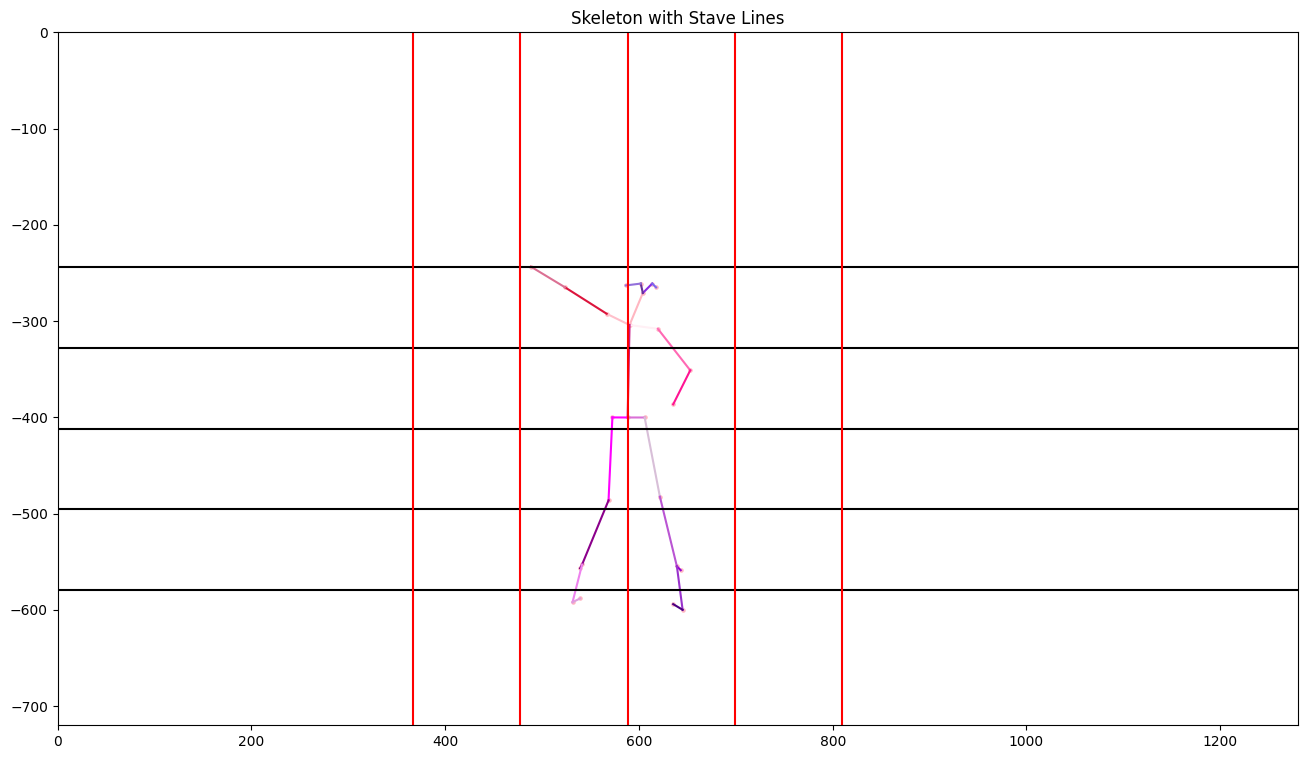

In [8]:
#TEST CODE TO VISUALIZE FRAME WITH STAVE LINES
#Plot a single sample frame with stave_Lines
#sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000529_keypoints.json"
sample_json_file_pth = "/Users/margauxbowditch/Dropbox/PhD/Last_Visuals/KIT0001/KIT0001_000000000529_keypoints.json" #Macbook

st_lines_arr = establish_stave_lines(sample_json_file_pth)
sag_lines_arr = establishSaggitalLines(sample_json_file_pth)
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
fig, ax = plt.subplots(1, figsize=(16,9))
ax.set_prop_cycle('color',penColor)
plt.title('Skeleton with Stave Lines')
plt.xlim(0, 1280)
plt.ylim(-720, 0)


#ToComment

img_json = pd.read_json(sample_json_file_pth)
keypoints = img_json.people[0]['pose_keypoints_2d']
#print(keypoints)
x = keypoints[0::3]
yorig = keypoints[1::3]
corig = keypoints[2::3]
y = [-y for y in yorig]
sc = ax.scatter(x,y, s=5)
for bone in bones:
    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
        continue
    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]])
plt.axhline(y = -st_lines_arr[0], color = 'black', linestyle = '-')
plt.axhline(y=-st_lines_arr[1], color = 'black', linestyle = '-')
plt.axhline(y = -st_lines_arr[2], color = 'black', linestyle = '-')
plt.axhline(y = -st_lines_arr[3], color = 'black', linestyle = '-')
plt.axhline(y = -st_lines_arr[4], color = 'black', linestyle = '-')

plt.axvline(x = sag_lines_arr[0], color = 'red', linestyle = '-')
plt.axvline(x = sag_lines_arr[1], color = 'red', linestyle = '-')
plt.axvline(x = sag_lines_arr[2], color = 'red', linestyle = '-')
plt.axvline(x = sag_lines_arr[3], color = 'red', linestyle = '-')
plt.axvline(x = sag_lines_arr[4], color = 'red', linestyle = '-')
#toComment

In [ ]:
#Can determine which foot is behind based on where the heels are.
#Have to do a check where the two feet are in relation to one another:
    #Is the dancer's left heel to the right of the right heel?
    #Is the dancer's right heel to the left of the left heel?
        # If the any one of the above two statements are true: the feet are in a crossed position.
        
#Determining which foot is in front is tricky - therefore we simply keep the coronal sign to be level or blank?...


In [6]:
#Helper method
def calculate_absolute_gradient(x1, y1, x2, y2):
    if(x1 == x2):
        return "undefined"
    gradient = (y2 - y1) / (x2 - x1)
    absolute_gradient = abs(gradient)
    return absolute_gradient

#Helper method
def getSingleFootOrientation(HeelX,HeelY,BigToeX,BigToeY):
    feet_gradient = calculate_absolute_gradient(HeelX, HeelY, BigToeX, BigToeY)
    foot_orientation = "Not_Calculated"
    #print("feet_gradient: ",feet_gradient)
    if feet_gradient == 'undefined':
        foot_orientation = "EnPointe"
    elif feet_gradient >= 0 and feet_gradient <= 0.2:
        foot_orientation = "Flat"
    elif feet_gradient > 0.2 and feet_gradient <= 1:
        foot_orientation = "Demi"
    elif feet_gradient > 1:
        foot_orientation = "EnPointe"
    return foot_orientation


In [10]:
#USED HELPER METHOD
def getBaseVecDictionary():
    #0-12 for staveline vertical position; 13-15 for in-front, level, behind; 16-20 for left, left-mid, mid, right-mid, right
    base_dict = {}
    vector_keywords = ['justbelowfeet','feet','justabovefeet','betweenfeetknees', 'knees', 'betweenkneeswaist',\
                       'waist','betweenwaistshoulders','shoulders', 'betweenshouldershead', 'head', 'abovehead', 'front', \
                       'level','behind','left', 'leftmid', 'mid', 'rightmid', 'right']
    #print(len(vector_keywords))
    i=0
    for kw in vector_keywords:
        base_dict[kw] = i
        i=i+1
    #print(base_dict)
    return base_dict
    #base_dict['bel
getBaseVecDictionary()

{'justbelowfeet': 0,
 'feet': 1,
 'justabovefeet': 2,
 'betweenfeetknees': 3,
 'knees': 4,
 'betweenkneeswaist': 5,
 'waist': 6,
 'betweenwaistshoulders': 7,
 'shoulders': 8,
 'betweenshouldershead': 9,
 'head': 10,
 'abovehead': 11,
 'front': 12,
 'level': 13,
 'behind': 14,
 'left': 15,
 'leftmid': 16,
 'mid': 17,
 'rightmid': 18,
 'right': 19}

In [8]:
#Was not used for ExtDerriere, now used for Echappe
def determineSaggitalPosition(sag_lines,x): # returns the vector position.
    # in openpose frame saggital positions: 4 3 (dancer's right) 2 (midline) 1 0 (dancer's left)
     #[left_line, left_mid_line, midline, right_mid_line, right_line]
    left_left_mid_dist = sag_lines[0] - sag_lines[1]
    midline_left_mid_dist = sag_lines[1] - sag_lines[2]
    midline_right_mid_dist = sag_lines[2] - sag_lines[3]   
    right_right_mid_dist = sag_lines[3] - sag_lines[4]
     
    x_index = 0
    #check where x lies:
    #between dancer's right_line and right_mid_line:
    if x >= sag_lines[4] and x < sag_lines[3]:
        if x == sag_lines[4]:
            x_index = 4
        x_to_right_dist = x - sag_lines[4]
        x_to_right_mid_dist = sag_lines[3] - x
        if x_to_right_dist < x_to_right_mid_dist: # if x is closer to the right_line
            x_index = 4
        else: # otherwise x is closer to the right_mid_line
            x_index = 3       
    #between right_mid_line and mid_line:
    if x >= sag_lines[3] and x < sag_lines[2]:
        if x == sag_lines[3]: # if it is equal to right mid
            x_index = 3 # right mid
        x_to_right_mid_dist = x - sag_lines[3]
        x_to_mid_dist = sag_lines[2] - x
        if x_to_right_mid_dist < x_to_mid_dist:#if x is closer to the right_mid line it is right_mid
            x_index = 3
        else:
            x_index = 2 # but if x is closer to the mid line, it is mid line
            
    #between mid_line and left_mid_line:
    if x >= sag_lines[2] and x < sag_lines[1]:
        if x == sag_lines[2]:
            x_index = 2
        x_to_mid_dist = x - sag_lines[2]
        x_to_left_mid_dist = sag_lines[1] - x
        if x_to_mid_dist < x_to_left_mid_dist: # if x is closer to midline it is midline
            x_index = 2
        else: 
            x_index = 1 #but if x is closer to left_mid_line - it is left_mid_line
    
    #between left_mid_line and left_line:
    if x >= sag_lines[1] and x <= sag_lines[0]:
        if x == sag_lines[1]:
            x_index = 1
        if x == sag_lines[0]:
            x_index = 0
        x_to_left_mid_dist = x - sag_lines[1]
        x_to_left_dist = sag_lines[0] - x
        if x_to_left_mid_dist < x_to_left_dist: #if x is closer to the left_mid_line it is left_mid
            x_index = 1
        else:
            x_index = 0 # otherwise x is closer to the left_line
    vec_dict = getBaseVecDictionary() 
    #print(x_index)
    # to get the index in the benesh vector where the saggital positions start.
    return x_index + vec_dict['left'] # x + 15. Result possibilities: 15,16,17,18,19.


In [9]:
#USED HELPER METHOD
def determinePointVerticalPosition(ycoord, stavelines, vec_dict):
    #stave lines are in format: [toph_line, feet_line, waist_line, shoulder_line, knees_line]
    benesh_vec_pos = 0
    if ycoord < stavelines[0]: # Had this wrong for arabesque - to fix!
        benesh_vec_pos = vec_dict['abovehead']
    #distances between stavelines are the same - determine for only one:
    betw_stvl_dist = stavelines[3] - stavelines[0]
    #print(betw_stvl_dist)
    padding_value = betw_stvl_dist/8
    feetline = stavelines[1]
    kneesline = stavelines[4]
    waistline = stavelines[2]
    shoulderline = stavelines[3]
    headline = stavelines[0]
    
    #[larger val(lower), smaller val(higher)]
    feetLine_range = [feetline + padding_value, feetline - padding_value]
    feet_knees_range = [feetline - padding_value, kneesline + padding_value]
    kneesLine_range = [kneesline + padding_value, kneesline - padding_value]
    knees_waist_range = [kneesline - padding_value, waistline + padding_value]
    waistLine_range = [waistline + padding_value, waistline - padding_value]
    waist_shoulder_range = [waistline - padding_value, shoulderline + padding_value]
    shoulderLine_range = [shoulderline + padding_value, shoulderline - padding_value]
    shoulder_head_range = [shoulderline - padding_value, headline +padding_value]
    headLine_range = [headline + padding_value, headline - padding_value]
    
    if ycoord <= feetLine_range[0] and ycoord >= feetLine_range[1]:
        benesh_vec_pos = vec_dict['feet']
    if ycoord < feet_knees_range[0] and ycoord > feet_knees_range[1]:
        benesh_vec_pos = vec_dict['betweenfeetknees']
    if ycoord <= kneesLine_range[0] and ycoord >= kneesLine_range[1]:
        benesh_vec_pos = vec_dict['knees']
    if ycoord < knees_waist_range[0] and ycoord > knees_waist_range[1]:
        benesh_vec_pos = vec_dict['betweenkneeswaist']
    if ycoord <= waistLine_range[0] and ycoord >= waistLine_range[1]:
        benesh_vec_pos = vec_dict['waist']
    if ycoord < waist_shoulder_range[0] and ycoord > waist_shoulder_range[1]:
        benesh_vec_pos = vec_dict['betweenwaistshoulders']
    if ycoord <= shoulderLine_range[0] and ycoord >= shoulderLine_range[1]:
        benesh_vec_pos = vec_dict['shoulders']
    if ycoord < shoulder_head_range[0] and ycoord > shoulder_head_range[1]:
        benesh_vec_pos = vec_dict['betweenshouldershead']
    if ycoord >= headLine_range[0] and ycoord <= headLine_range[1]:
        benesh_vec_pos = vec_dict['head']
    #print(benesh_vec_pos)
    return benesh_vec_pos
#vec_dict = getBaseVecDictionary()
#determinePointVerticalPosition(586.301,[154.88749264020163, 614.4636544356798, 384.67557353794075, 269.78153308907116, 499.5696139868103],vec_dict)

In [ ]:
#RHeel:24 RAnkle:11 RBigToe:22 RSmallToe:23
#LHeel:21 LAnkle:14 LBigToe:19 LSmallToe:20
#Important skeleton foot coords being kept 24 Rheel, 22 RBigToe, 21 LHeel, 19 LBigToe,

In [10]:
def createEchappeSecondBeneshVector(json_file_path):
    skel_json = pd.read_json(json_file_path)
    keypoints = skel_json.people[0]['pose_keypoints_2d']
    x = keypoints[0::3]
    y = keypoints[1::3]
    
    #helper methods:
    #get the stave lines for this file [toph_line, feet_line, waist_line, shoulder_line, knees_line]
    st_lines_arr = establish_stave_lines(json_file_path)
    sag_lines = establishSaggitalLines(json_file_path) 
    #sag_lines = [left_line, left_mid_line, midline, right_mid_line, right_line] #represents the dancer's left and right (not audience)
    vec_dict = getBaseVecDictionary()
    
    #right foot
    rf_vec = [0 for element in range(len(vec_dict))]
    #determine whether the right foot is flat, demi or en pointe - getSingleFootOrientation(HeelX,HeelY,BigToeX,BigToeY)
    R_ft_orientation = getSingleFootOrientation(x[24],y[24],x[22],y[22])
    rf_vertical_index = 0
    if R_ft_orientation == 'EnPointe':
        rf_vertical_index = vec_dict['justabovefeet']
    elif R_ft_orientation == 'Demi':
        rf_vertical_index = vec_dict['feet']
    elif R_ft_orientation == 'Flat':
        rf_vertical_index = vec_dict['justbelowfeet']  
    rf_coronal_index = vec_dict['level'] # Always level for echappe feet
    #determine saggital position of the right big toe (22) -> (benesh vec positions: 16, 17, 18, 19, 20)
    rf_saggital_index = determineSaggitalPosition(sag_lines,x[22])
    rf_vec[rf_vertical_index] = 1
    rf_vec[rf_coronal_index] = 1
    rf_vec[rf_saggital_index] = 1
        
    #left foot
    lf_vec = [0 for elem in range(len(vec_dict))]
    #determine whether the left foot is flat, demi or en pointe
    L_ft_orientation = getSingleFootOrientation(x[21],y[21],x[19],y[19])
    lf_vertical_index = 0
    if L_ft_orientation == 'EnPointe':
        lf_vertical_index = vec_dict['justabovefeet']
    elif L_ft_orientation == 'Demi':
        lf_vertical_index = vec_dict['feet']
    elif L_ft_orientation == 'Flat':
        lf_vertical_index = vec_dict['justbelowfeet']  
    lf_coronal_index = vec_dict['level'] # Always level for echappe feet
    #determine saggital position of left big toe (19)
    lf_saggital_index = determineSaggitalPosition(sag_lines,x[19])
    lf_vec[lf_vertical_index] = 1
    lf_vec[lf_coronal_index] = 1
    lf_vec[lf_saggital_index] = 1
    
    #right hand
    rh_vec = [0 for elem in range(len(vec_dict))]
    #determine vertical position
    rh_vertical_index = determinePointVerticalPosition(y[4], st_lines_arr, vec_dict)
    #print("RH_y_COORD: ",y[4])
    #determine saggital position
    rh_saggital_index = determineSaggitalPosition(sag_lines, x[4])
    #default coronal position - let's make it level:
    rh_coronal_index = vec_dict['level']
    #determine sign: above head (in front), close to midline saggital (in front), else: level (not usually behind for echappe)
    if rh_vertical_index == vec_dict['abovehead']:
        rh_coronal_index = vec_dict['front']
    elif rh_saggital_index == vec_dict['mid']: # if close to midline: it is in front:
        rh_coronal_index = vec_dict['front']
    else:
        rh_coronal_index = vec_dict['level'] # otherwise it is level.
    rh_vec[rh_vertical_index] = 1
    rh_vec[rh_coronal_index] = 1
    rh_vec[rh_saggital_index] = 1 
         
    #left hand
    lh_vec = [0 for elem in range(len(vec_dict))]
    #determine vertical position
    lh_vertical_index = determinePointVerticalPosition(y[7], st_lines_arr, vec_dict)
    #determine saggital position
    lh_saggital_index = determineSaggitalPosition(sag_lines, x[7])
    #default coronal position - let's make it level:
    lh_coronal_index = vec_dict['level']
    #determine sign: above head (in front), close to midline (in front), else: level (not usually behind for echappe)
    if lh_vertical_index == vec_dict['abovehead']:
        lh_coronal_index = vec_dict['front']
    elif lh_saggital_index == vec_dict['mid']: # if close to midline: it is in front
        lh_coronal_index = vec_dict['front']
    else:
        lh_coronal_index = vec_dict['level'] #otherwise it's level
    lh_vec[lh_vertical_index] = 1
    lh_vec[lh_coronal_index] = 1
    lh_vec[lh_saggital_index] = 1
    
    turn_bit = [0]
    
    final_vec = rf_vec + lf_vec + rh_vec +lh_vec + turn_bit
    #print(final_vec)
    base_save_file_ls = json_file_path.split("/")
    skeleton_name = base_save_file_ls[-1]
    benesh_name = skeleton_name.replace('keypoints','benesh')
    #print("benesh_name: ",benesh_name)
    save_benesh_path = "./BeneshYDataPerClass/3-EchappeSecond/"+benesh_name
    #print(save_benesh_path)
    with open(save_benesh_path, 'w') as f:
        json.dump(final_vec, f)
    return final_vec

# sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000529_keypoints.json"
# createEchappeSecondBeneshVector(sample_json_file_pth)
    

In [11]:
#Useful for saving readable versions of vectors
def BeneshVecToText(benesh_vec):
    vec_dict = getBaseVecDictionary()
    rev_vec_dict = {y: x for x, y in vec_dict.items()}
    print(rev_vec_dict)
    rf_vec = benesh_vec[0:20]
    lf_vec = benesh_vec[20:40]
    rh_vec = benesh_vec[40:60]
    lh_vec = benesh_vec[60:80]
    print(lh_vec)
    print(len(lf_vec))
    rf_text = []
    lf_text = []
    rh_text = []
    lh_text = []

    #84 indices in length {[0 - 20] = right foot} {[21 - 41] = left foot} {[42-62] = right hand} {[63-83] = left hand}
    for i in range(len(rf_vec)): #vectors are the same length
        if rf_vec[i] == 1:
            #print("rf",rev_vec_dict[i])
            rf_text.append(rev_vec_dict[i])
            
    for i in range(len(lf_vec)):
        if lf_vec[i] == 1:
            #print("lf",rev_vec_dict[i])
            lf_text.append(rev_vec_dict[i])
    
    for i in range(len(rh_vec)): #vectors are the same length
        if rh_vec[i] == 1:
            #print("rh",rev_vec_dict[i])
            rh_text.append(rev_vec_dict[i])
        
    for i in range(len(lh_vec)): #vectors are the same length
        if lh_vec[i] == 1:
            #print("lh",rev_vec_dict[i])
            lh_text.append(rev_vec_dict[i])
    
    print(f"Right Foot: <Vertical: {rf_text[0]}> <Coronal: {rf_text[1]}> <Saggital: {rf_text[2]}>")
    print(f"Left Foot: <Vertical: {lf_text[0]}> <Coronal: {lf_text[1]}> <Saggital: {lf_text[2]}>")
    print(f"Right Hand: <Vertical: {rh_text[0]}> <Coronal: {rh_text[1]}> <Saggital: {rh_text[2]}>")
    print(f"Left Hand: <Vertical: {lh_text[0]}> <Coronal: {lh_text[1]}> <Saggital: {lh_text[2]}>")
    print(f"Turn Bit {benesh_vec[80]}")
    print(f"TOTAL LENGTH: {len(benesh_vec)}")

# sample_json_file_pth = "C:/Users/margauxf/Dropbox/2023-OpenPose/JSON/KIT0001/KIT0001_000000000529_keypoints.json"
# bv = createEchappeSecondBeneshVector(sample_json_file_pth)
# BeneshVecToText(bv)

BMN_file = "/Users/margauxbowditch/Dropbox/PhD/Last_Visuals/EchappeSecond/KIT0001_000000000529_benesh.json"
with open(BMN_file, "r") as file:
    BMNVec = json.load(file)
print(BMNVec)
BeneshVecToText(BMNVec)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
{0: 'justbelowfeet', 1: 'feet', 2: 'justabovefeet', 3: 'betweenfeetknees', 4: 'knees', 5: 'betweenkneeswaist', 6: 'waist', 7: 'betweenwaistshoulders', 8: 'shoulders', 9: 'betweenshouldershead', 10: 'head', 11: 'abovehead', 12: 'front', 13: 'level', 14: 'behind', 15: 'left', 16: 'leftmid', 17: 'mid', 18: 'rightmid', 19: 'right'}
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
20
Right Foot: <Vertical: justabovefeet> <Coronal: level> <Saggital: rightmid>
Left Foot: <Vertical: justabovefeet> <Coronal: level> <Saggital: leftmid>
Right Hand: <Vertical: abovehead> <Coronal: front> <Saggital: rightmid>
Left Hand: <Vertical: betweenwaistshoulders> <Coronal: front> <Saggital: mid>
Turn Bit 0
TOTAL LENGTH: 81


In [12]:
#Loop through all the EchappeSecond (class 3) json files and create and save benesh vectors for them
import os
keypoints_folder = "./SkeletonXDataUnnormalised/3-EchappeSecond"

def getTotalFiles():
    total = 0
    for file in os.listdir(keypoints_folder):
        total+=1
    print(total)
    return total

def MakeBeneshForClass3(kpf):
    total_num_files = getTotalFiles()
    counter = 0
    for jsonFile in os.listdir(kpf):
        json_path = keypoints_folder+"/"+jsonFile
        print(json_path)
        createEchappeSecondBeneshVector(json_path)
        counter+=1
        print(f"{counter}/{total_num_files} DONE")
    
MakeBeneshForClass3(keypoints_folder)

10025
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000424_keypoints.json
1/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000425_keypoints.json
2/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000426_keypoints.json
3/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000427_keypoints.json
4/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000428_keypoints.json
5/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000429_keypoints.json
6/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000430_keypoints.json
7/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000431_keypoints.json
8/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000432_keypoints.json
9/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000433_keypoints.json
10/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_00000000043

96/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000579_keypoints.json
97/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000580_keypoints.json
98/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000581_keypoints.json
99/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000636_keypoints.json
100/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000637_keypoints.json
101/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000638_keypoints.json
102/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000639_keypoints.json
103/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000640_keypoints.json
104/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000641_keypoints.json
105/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0000_000000000642_keypoints.json
106/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSe

187/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000513_keypoints.json
188/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000514_keypoints.json
189/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000515_keypoints.json
190/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000520_keypoints.json
191/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000521_keypoints.json
192/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000588_keypoints.json
193/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000589_keypoints.json
194/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000590_keypoints.json
195/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000591_keypoints.json
196/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000592_keypoints.json
197/10025 DONE
./SkeletonXDataUnnormalised/3-Echap

275/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000744_keypoints.json
276/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000745_keypoints.json
277/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000746_keypoints.json
278/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000752_keypoints.json
279/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0003_000000000753_keypoints.json
280/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000485_keypoints.json
281/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000486_keypoints.json
282/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000487_keypoints.json
283/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000488_keypoints.json
284/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000489_keypoints.json
285/10025 DONE
./SkeletonXDataUnnormalised/3-Echap

363/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000650_keypoints.json
364/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000651_keypoints.json
365/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000652_keypoints.json
366/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000653_keypoints.json
367/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000654_keypoints.json
368/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000655_keypoints.json
369/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000656_keypoints.json
370/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000657_keypoints.json
371/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000658_keypoints.json
372/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0004_000000000659_keypoints.json
373/10025 DONE
./SkeletonXDataUnnormalised/3-Echap

450/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000460_keypoints.json
451/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000461_keypoints.json
452/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000462_keypoints.json
453/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000463_keypoints.json
454/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000464_keypoints.json
455/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000465_keypoints.json
456/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000466_keypoints.json
457/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000467_keypoints.json
458/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000468_keypoints.json
459/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000469_keypoints.json
460/10025 DONE
./SkeletonXDataUnnormalised/3-Echap

538/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000671_keypoints.json
539/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000672_keypoints.json
540/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000673_keypoints.json
541/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000674_keypoints.json
542/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000675_keypoints.json
543/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000676_keypoints.json
544/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000677_keypoints.json
545/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000678_keypoints.json
546/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000679_keypoints.json
547/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0005_000000000680_keypoints.json
548/10025 DONE
./SkeletonXDataUnnormalised/3-Echap

631/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000657_keypoints.json
632/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000658_keypoints.json
633/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000659_keypoints.json
634/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000660_keypoints.json
635/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000661_keypoints.json
636/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000662_keypoints.json
637/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000663_keypoints.json
638/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000664_keypoints.json
639/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000665_keypoints.json
640/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000666_keypoints.json
641/10025 DONE
./SkeletonXDataUnnormalised/3-Echap

724/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000819_keypoints.json
725/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000820_keypoints.json
726/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000821_keypoints.json
727/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000822_keypoints.json
728/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000823_keypoints.json
729/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000824_keypoints.json
730/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000825_keypoints.json
731/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000826_keypoints.json
732/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000827_keypoints.json
733/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0007_000000000828_keypoints.json
734/10025 DONE
./SkeletonXDataUnnormalised/3-Echap

818/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0008_000000000822_keypoints.json
819/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0008_000000000823_keypoints.json
820/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0008_000000000824_keypoints.json
821/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0008_000000000825_keypoints.json
822/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0008_000000000826_keypoints.json
823/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0008_000000000827_keypoints.json
824/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0008_000000000828_keypoints.json
825/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0008_000000000829_keypoints.json
826/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0008_000000000830_keypoints.json
827/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0008_000000000831_keypoints.json
828/10025 DONE
./SkeletonXDataUnnormalised/3-Echap

907/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0010_000000000646_keypoints.json
908/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0010_000000000647_keypoints.json
909/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0010_000000000648_keypoints.json
910/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0010_000000000649_keypoints.json
911/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0010_000000000650_keypoints.json
912/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0010_000000000651_keypoints.json
913/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0010_000000000652_keypoints.json
914/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0010_000000000653_keypoints.json
915/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0010_000000000654_keypoints.json
916/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0010_000000000655_keypoints.json
917/10025 DONE
./SkeletonXDataUnnormalised/3-Echap

1000/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000568_keypoints.json
1001/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000569_keypoints.json
1002/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000581_keypoints.json
1003/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000585_keypoints.json
1004/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000586_keypoints.json
1005/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000591_keypoints.json
1006/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000592_keypoints.json
1007/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000593_keypoints.json
1008/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000662_keypoints.json
1009/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000663_keypoints.json
1010/10025 DONE
./SkeletonXDataUnnormali

1086/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000819_keypoints.json
1087/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000820_keypoints.json
1088/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000821_keypoints.json
1089/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000822_keypoints.json
1090/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000823_keypoints.json
1091/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000824_keypoints.json
1092/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000825_keypoints.json
1093/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000826_keypoints.json
1094/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000827_keypoints.json
1095/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0012_000000000831_keypoints.json
1096/10025 DONE
./SkeletonXDataUnnormali

1173/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0013_000000000734_keypoints.json
1174/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0013_000000000735_keypoints.json
1175/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0013_000000000736_keypoints.json
1176/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0013_000000000737_keypoints.json
1177/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0013_000000000738_keypoints.json
1178/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0013_000000000739_keypoints.json
1179/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0013_000000000740_keypoints.json
1180/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0013_000000000741_keypoints.json
1181/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0013_000000000742_keypoints.json
1182/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0013_000000000743_keypoints.json
1183/10025 DONE
./SkeletonXDataUnnormali

1264/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0016_000000000529_keypoints.json
1265/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0016_000000000530_keypoints.json
1266/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0016_000000000531_keypoints.json
1267/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0016_000000000532_keypoints.json
1268/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0016_000000000533_keypoints.json
1269/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0016_000000000534_keypoints.json
1270/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0016_000000000535_keypoints.json
1271/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0016_000000000536_keypoints.json
1272/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0016_000000000537_keypoints.json
1273/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0016_000000000538_keypoints.json
1274/10025 DONE
./SkeletonXDataUnnormali

1354/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000507_keypoints.json
1355/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000508_keypoints.json
1356/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000509_keypoints.json
1357/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000510_keypoints.json
1358/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000511_keypoints.json
1359/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000512_keypoints.json
1360/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000513_keypoints.json
1361/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000514_keypoints.json
1362/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000515_keypoints.json
1363/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000516_keypoints.json
1364/10025 DONE
./SkeletonXDataUnnormali

1440/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000730_keypoints.json
1441/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000731_keypoints.json
1442/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000732_keypoints.json
1443/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000733_keypoints.json
1444/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000734_keypoints.json
1445/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000735_keypoints.json
1446/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000736_keypoints.json
1447/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000737_keypoints.json
1448/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000739_keypoints.json
1449/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0018_000000000740_keypoints.json
1450/10025 DONE
./SkeletonXDataUnnormali

1530/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0019_000000000579_keypoints.json
1531/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0019_000000000580_keypoints.json
1532/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0019_000000000581_keypoints.json
1533/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0019_000000000582_keypoints.json
1534/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0019_000000000583_keypoints.json
1535/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0019_000000000584_keypoints.json
1536/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0019_000000000585_keypoints.json
1537/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0019_000000000586_keypoints.json
1538/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0019_000000000587_keypoints.json
1539/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0019_000000000588_keypoints.json
1540/10025 DONE
./SkeletonXDataUnnormali

1621/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000501_keypoints.json
1622/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000502_keypoints.json
1623/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000503_keypoints.json
1624/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000504_keypoints.json
1625/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000505_keypoints.json
1626/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000506_keypoints.json
1627/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000507_keypoints.json
1628/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000508_keypoints.json
1629/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000509_keypoints.json
1630/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000510_keypoints.json
1631/10025 DONE
./SkeletonXDataUnnormali

1708/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000709_keypoints.json
1709/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000710_keypoints.json
1710/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000711_keypoints.json
1711/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000712_keypoints.json
1712/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000713_keypoints.json
1713/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000714_keypoints.json
1714/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000715_keypoints.json
1715/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000716_keypoints.json
1716/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000717_keypoints.json
1717/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0020_000000000718_keypoints.json
1718/10025 DONE
./SkeletonXDataUnnormali

1795/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000483_keypoints.json
1796/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000484_keypoints.json
1797/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000485_keypoints.json
1798/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000487_keypoints.json
1799/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000488_keypoints.json
1800/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000489_keypoints.json
1801/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000490_keypoints.json
1802/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000491_keypoints.json
1803/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000492_keypoints.json
1804/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000548_keypoints.json
1805/10025 DONE
./SkeletonXDataUnnormali

1882/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000681_keypoints.json
1883/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000682_keypoints.json
1884/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000683_keypoints.json
1885/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000684_keypoints.json
1886/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000685_keypoints.json
1887/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000686_keypoints.json
1888/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000687_keypoints.json
1889/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000688_keypoints.json
1890/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000689_keypoints.json
1891/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0022_000000000690_keypoints.json
1892/10025 DONE
./SkeletonXDataUnnormali

1971/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0023_000000000525_keypoints.json
1972/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0023_000000000526_keypoints.json
1973/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0023_000000000527_keypoints.json
1974/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0023_000000000528_keypoints.json
1975/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0023_000000000529_keypoints.json
1976/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0023_000000000530_keypoints.json
1977/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0023_000000000531_keypoints.json
1978/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0023_000000000532_keypoints.json
1979/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0023_000000000533_keypoints.json
1980/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0023_000000000534_keypoints.json
1981/10025 DONE
./SkeletonXDataUnnormali

2060/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000428_keypoints.json
2061/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000429_keypoints.json
2062/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000430_keypoints.json
2063/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000431_keypoints.json
2064/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000432_keypoints.json
2065/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000433_keypoints.json
2066/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000434_keypoints.json
2067/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000435_keypoints.json
2068/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000438_keypoints.json
2069/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000439_keypoints.json
2070/10025 DONE
./SkeletonXDataUnnormali

2152/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000631_keypoints.json
2153/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000632_keypoints.json
2154/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000633_keypoints.json
2155/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000634_keypoints.json
2156/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000635_keypoints.json
2157/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000636_keypoints.json
2158/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000637_keypoints.json
2159/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000638_keypoints.json
2160/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000639_keypoints.json
2161/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0025_000000000640_keypoints.json
2162/10025 DONE
./SkeletonXDataUnnormali

2238/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0026_000000000554_keypoints.json
2239/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0026_000000000555_keypoints.json
2240/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0026_000000000556_keypoints.json
2241/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0026_000000000557_keypoints.json
2242/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0026_000000000558_keypoints.json
2243/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0026_000000000559_keypoints.json
2244/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0026_000000000560_keypoints.json
2245/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0026_000000000561_keypoints.json
2246/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0026_000000000562_keypoints.json
2247/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0026_000000000563_keypoints.json
2248/10025 DONE
./SkeletonXDataUnnormali

2324/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000546_keypoints.json
2325/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000547_keypoints.json
2326/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000548_keypoints.json
2327/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000549_keypoints.json
2328/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000550_keypoints.json
2329/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000551_keypoints.json
2330/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000552_keypoints.json
2331/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000553_keypoints.json
2332/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000554_keypoints.json
2333/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000555_keypoints.json
2334/10025 DONE
./SkeletonXDataUnnormali

2417/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000716_keypoints.json
2418/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000717_keypoints.json
2419/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000718_keypoints.json
2420/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000719_keypoints.json
2421/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000720_keypoints.json
2422/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000721_keypoints.json
2423/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000722_keypoints.json
2424/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000723_keypoints.json
2425/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000724_keypoints.json
2426/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0027_000000000725_keypoints.json
2427/10025 DONE
./SkeletonXDataUnnormali

2504/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0028_000000000607_keypoints.json
2505/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0028_000000000608_keypoints.json
2506/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0028_000000000609_keypoints.json
2507/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0028_000000000610_keypoints.json
2508/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0028_000000000611_keypoints.json
2509/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0028_000000000612_keypoints.json
2510/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0028_000000000613_keypoints.json
2511/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0028_000000000614_keypoints.json
2512/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0028_000000000618_keypoints.json
2513/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0028_000000000620_keypoints.json
2514/10025 DONE
./SkeletonXDataUnnormali

2592/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0029_000000000503_keypoints.json
2593/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0029_000000000504_keypoints.json
2594/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0029_000000000505_keypoints.json
2595/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0029_000000000506_keypoints.json
2596/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0029_000000000507_keypoints.json
2597/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0029_000000000508_keypoints.json
2598/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0029_000000000509_keypoints.json
2599/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0029_000000000510_keypoints.json
2600/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0029_000000000511_keypoints.json
2601/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/BLU0029_000000000512_keypoints.json
2602/10025 DONE
./SkeletonXDataUnnormali

2682/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0000_000000000036_keypoints.json
2683/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0000_000000000037_keypoints.json
2684/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0000_000000000038_keypoints.json
2685/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0000_000000000039_keypoints.json
2686/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0000_000000000040_keypoints.json
2687/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0000_000000000041_keypoints.json
2688/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0000_000000000042_keypoints.json
2689/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0000_000000000043_keypoints.json
2690/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0000_000000000045_keypoints.json
2691/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0000_000000000047_keypoints.json
2692/10025 DONE
./SkeletonXDataUnnormali

2772/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000022_keypoints.json
2773/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000023_keypoints.json
2774/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000024_keypoints.json
2775/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000025_keypoints.json
2776/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000026_keypoints.json
2777/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000028_keypoints.json
2778/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000030_keypoints.json
2779/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000031_keypoints.json
2780/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000032_keypoints.json
2781/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000035_keypoints.json
2782/10025 DONE
./SkeletonXDataUnnormali

2865/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000345_keypoints.json
2866/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000346_keypoints.json
2867/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000347_keypoints.json
2868/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000348_keypoints.json
2869/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000349_keypoints.json
2870/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000350_keypoints.json
2871/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000351_keypoints.json
2872/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000352_keypoints.json
2873/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000353_keypoints.json
2874/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0006_000000000354_keypoints.json
2875/10025 DONE
./SkeletonXDataUnnormali

2953/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0010_000000000341_keypoints.json
2954/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0010_000000000342_keypoints.json
2955/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0010_000000000343_keypoints.json
2956/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0010_000000000344_keypoints.json
2957/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0010_000000000345_keypoints.json
2958/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0010_000000000346_keypoints.json
2959/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0010_000000000347_keypoints.json
2960/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0010_000000000348_keypoints.json
2961/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0010_000000000349_keypoints.json
2962/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0020_000000000025_keypoints.json
2963/10025 DONE
./SkeletonXDataUnnormali

3043/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0020_000000000321_keypoints.json
3044/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0020_000000000322_keypoints.json
3045/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0020_000000000323_keypoints.json
3046/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0020_000000000324_keypoints.json
3047/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0020_000000000325_keypoints.json
3048/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0020_000000000326_keypoints.json
3049/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0020_000000000327_keypoints.json
3050/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0020_000000000328_keypoints.json
3051/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0020_000000000329_keypoints.json
3052/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0020_000000000330_keypoints.json
3053/10025 DONE
./SkeletonXDataUnnormali

3133/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0023_000000000185_keypoints.json
3134/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0023_000000000186_keypoints.json
3135/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0023_000000000187_keypoints.json
3136/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0023_000000000188_keypoints.json
3137/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0023_000000000189_keypoints.json
3138/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0023_000000000191_keypoints.json
3139/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0023_000000000192_keypoints.json
3140/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0023_000000000194_keypoints.json
3141/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0023_000000000201_keypoints.json
3142/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0023_000000000202_keypoints.json
3143/10025 DONE
./SkeletonXDataUnnormali

3223/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0025_000000000188_keypoints.json
3224/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0025_000000000189_keypoints.json
3225/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0025_000000000190_keypoints.json
3226/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0025_000000000191_keypoints.json
3227/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0025_000000000192_keypoints.json
3228/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0025_000000000193_keypoints.json
3229/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0025_000000000197_keypoints.json
3230/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0025_000000000201_keypoints.json
3231/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0025_000000000202_keypoints.json
3232/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0025_000000000208_keypoints.json
3233/10025 DONE
./SkeletonXDataUnnormali

3316/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0031_000000000162_keypoints.json
3317/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0031_000000000163_keypoints.json
3318/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0031_000000000164_keypoints.json
3319/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0031_000000000165_keypoints.json
3320/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0031_000000000166_keypoints.json
3321/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0031_000000000167_keypoints.json
3322/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0031_000000000168_keypoints.json
3323/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0031_000000000169_keypoints.json
3324/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0031_000000000170_keypoints.json
3325/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0031_000000000171_keypoints.json
3326/10025 DONE
./SkeletonXDataUnnormali

3409/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0033_000000000046_keypoints.json
3410/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0033_000000000047_keypoints.json
3411/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0033_000000000048_keypoints.json
3412/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0033_000000000049_keypoints.json
3413/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0033_000000000050_keypoints.json
3414/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0033_000000000051_keypoints.json
3415/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0033_000000000052_keypoints.json
3416/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0033_000000000053_keypoints.json
3417/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0033_000000000054_keypoints.json
3418/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0033_000000000160_keypoints.json
3419/10025 DONE
./SkeletonXDataUnnormali

3498/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0035_000000000010_keypoints.json
3499/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0035_000000000020_keypoints.json
3500/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0035_000000000021_keypoints.json
3501/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0035_000000000022_keypoints.json
3502/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0035_000000000023_keypoints.json
3503/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0035_000000000024_keypoints.json
3504/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0035_000000000026_keypoints.json
3505/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0035_000000000030_keypoints.json
3506/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0035_000000000031_keypoints.json
3507/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0035_000000000032_keypoints.json
3508/10025 DONE
./SkeletonXDataUnnormali

3587/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000036_keypoints.json
3588/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000037_keypoints.json
3589/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000038_keypoints.json
3590/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000039_keypoints.json
3591/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000040_keypoints.json
3592/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000042_keypoints.json
3593/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000043_keypoints.json
3594/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000044_keypoints.json
3595/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000045_keypoints.json
3596/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000046_keypoints.json
3597/10025 DONE
./SkeletonXDataUnnormali

3673/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000332_keypoints.json
3674/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000333_keypoints.json
3675/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000334_keypoints.json
3676/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000335_keypoints.json
3677/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000336_keypoints.json
3678/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000337_keypoints.json
3679/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000338_keypoints.json
3680/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000339_keypoints.json
3681/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000340_keypoints.json
3682/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0036_000000000341_keypoints.json
3683/10025 DONE
./SkeletonXDataUnnormali

3760/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0038_000000000182_keypoints.json
3761/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0038_000000000183_keypoints.json
3762/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0038_000000000184_keypoints.json
3763/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0038_000000000185_keypoints.json
3764/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0038_000000000186_keypoints.json
3765/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0038_000000000187_keypoints.json
3766/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0038_000000000188_keypoints.json
3767/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0038_000000000189_keypoints.json
3768/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0038_000000000190_keypoints.json
3769/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0038_000000000191_keypoints.json
3770/10025 DONE
./SkeletonXDataUnnormali

3847/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0039_000000000056_keypoints.json
3848/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0039_000000000057_keypoints.json
3849/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0039_000000000058_keypoints.json
3850/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0039_000000000166_keypoints.json
3851/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0039_000000000167_keypoints.json
3852/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0039_000000000168_keypoints.json
3853/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0039_000000000169_keypoints.json
3854/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0039_000000000170_keypoints.json
3855/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0039_000000000171_keypoints.json
3856/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0039_000000000172_keypoints.json
3857/10025 DONE
./SkeletonXDataUnnormali

3939/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0041_000000000204_keypoints.json
3940/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0041_000000000205_keypoints.json
3941/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0041_000000000206_keypoints.json
3942/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0041_000000000207_keypoints.json
3943/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0041_000000000208_keypoints.json
3944/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0041_000000000209_keypoints.json
3945/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0041_000000000210_keypoints.json
3946/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0041_000000000312_keypoints.json
3947/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0041_000000000313_keypoints.json
3948/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0041_000000000314_keypoints.json
3949/10025 DONE
./SkeletonXDataUnnormali

4029/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0046_000000000202_keypoints.json
4030/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0046_000000000203_keypoints.json
4031/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0046_000000000204_keypoints.json
4032/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0046_000000000205_keypoints.json
4033/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0046_000000000207_keypoints.json
4034/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0046_000000000209_keypoints.json
4035/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0046_000000000210_keypoints.json
4036/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0046_000000000211_keypoints.json
4037/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0046_000000000212_keypoints.json
4038/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0046_000000000213_keypoints.json
4039/10025 DONE
./SkeletonXDataUnnormali

4119/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0047_000000000062_keypoints.json
4120/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0047_000000000174_keypoints.json
4121/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0047_000000000175_keypoints.json
4122/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0047_000000000176_keypoints.json
4123/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0047_000000000177_keypoints.json
4124/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0047_000000000178_keypoints.json
4125/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0047_000000000179_keypoints.json
4126/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0047_000000000180_keypoints.json
4127/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0047_000000000181_keypoints.json
4128/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0047_000000000182_keypoints.json
4129/10025 DONE
./SkeletonXDataUnnormali

4205/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000025_keypoints.json
4206/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000026_keypoints.json
4207/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000027_keypoints.json
4208/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000028_keypoints.json
4209/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000029_keypoints.json
4210/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000030_keypoints.json
4211/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000032_keypoints.json
4212/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000033_keypoints.json
4213/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000036_keypoints.json
4214/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000037_keypoints.json
4215/10025 DONE
./SkeletonXDataUnnormali

4292/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000353_keypoints.json
4293/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000354_keypoints.json
4294/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000355_keypoints.json
4295/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000356_keypoints.json
4296/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000357_keypoints.json
4297/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0048_000000000358_keypoints.json
4298/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000034_keypoints.json
4299/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000035_keypoints.json
4300/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000036_keypoints.json
4301/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000037_keypoints.json
4302/10025 DONE
./SkeletonXDataUnnormali

4383/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000343_keypoints.json
4384/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000344_keypoints.json
4385/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000345_keypoints.json
4386/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000346_keypoints.json
4387/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000347_keypoints.json
4388/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000349_keypoints.json
4389/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000350_keypoints.json
4390/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000351_keypoints.json
4391/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000352_keypoints.json
4392/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0049_000000000353_keypoints.json
4393/10025 DONE
./SkeletonXDataUnnormali

4470/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0054_000000000027_keypoints.json
4471/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0054_000000000028_keypoints.json
4472/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0054_000000000029_keypoints.json
4473/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0054_000000000030_keypoints.json
4474/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0054_000000000032_keypoints.json
4475/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0054_000000000033_keypoints.json
4476/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0054_000000000035_keypoints.json
4477/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0054_000000000037_keypoints.json
4478/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0054_000000000038_keypoints.json
4479/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0054_000000000039_keypoints.json
4480/10025 DONE
./SkeletonXDataUnnormali

4557/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0056_000000000036_keypoints.json
4558/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0056_000000000037_keypoints.json
4559/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0056_000000000038_keypoints.json
4560/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0056_000000000039_keypoints.json
4561/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0056_000000000040_keypoints.json
4562/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0056_000000000041_keypoints.json
4563/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0056_000000000042_keypoints.json
4564/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0056_000000000043_keypoints.json
4565/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0056_000000000044_keypoints.json
4566/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/ESM0056_000000000045_keypoints.json
4567/10025 DONE
./SkeletonXDataUnnormali

4645/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000524_keypoints.json
4646/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000525_keypoints.json
4647/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000526_keypoints.json
4648/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000527_keypoints.json
4649/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000528_keypoints.json
4650/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000529_keypoints.json
4651/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000530_keypoints.json
4652/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000531_keypoints.json
4653/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000532_keypoints.json
4654/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000533_keypoints.json
4655/10025 DONE
./SkeletonXDataUnnormali

4733/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000699_keypoints.json
4734/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000700_keypoints.json
4735/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000701_keypoints.json
4736/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000702_keypoints.json
4737/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000703_keypoints.json
4738/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000704_keypoints.json
4739/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000705_keypoints.json
4740/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000706_keypoints.json
4741/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000707_keypoints.json
4742/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000708_keypoints.json
4743/10025 DONE
./SkeletonXDataUnnormali

4825/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000873_keypoints.json
4826/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000874_keypoints.json
4827/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000875_keypoints.json
4828/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000876_keypoints.json
4829/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000877_keypoints.json
4830/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000878_keypoints.json
4831/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000879_keypoints.json
4832/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000880_keypoints.json
4833/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000881_keypoints.json
4834/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0001_000000000882_keypoints.json
4835/10025 DONE
./SkeletonXDataUnnormali

4918/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000677_keypoints.json
4919/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000678_keypoints.json
4920/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000679_keypoints.json
4921/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000680_keypoints.json
4922/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000681_keypoints.json
4923/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000682_keypoints.json
4924/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000683_keypoints.json
4925/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000684_keypoints.json
4926/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000685_keypoints.json
4927/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000686_keypoints.json
4928/10025 DONE
./SkeletonXDataUnnormali

5008/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000879_keypoints.json
5009/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000880_keypoints.json
5010/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000881_keypoints.json
5011/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000882_keypoints.json
5012/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000883_keypoints.json
5013/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000884_keypoints.json
5014/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000885_keypoints.json
5015/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000886_keypoints.json
5016/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000887_keypoints.json
5017/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000000888_keypoints.json
5018/10025 DONE
./SkeletonXDataUnnormali

5098/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000001077_keypoints.json
5099/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000001078_keypoints.json
5100/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000001079_keypoints.json
5101/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000001080_keypoints.json
5102/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000001081_keypoints.json
5103/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0002_000000001082_keypoints.json
5104/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000552_keypoints.json
5105/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000553_keypoints.json
5106/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000554_keypoints.json
5107/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000555_keypoints.json
5108/10025 DONE
./SkeletonXDataUnnormali

5187/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000754_keypoints.json
5188/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000755_keypoints.json
5189/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000756_keypoints.json
5190/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000757_keypoints.json
5191/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000758_keypoints.json
5192/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000759_keypoints.json
5193/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000760_keypoints.json
5194/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000761_keypoints.json
5195/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000762_keypoints.json
5196/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000763_keypoints.json
5197/10025 DONE
./SkeletonXDataUnnormali

5275/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000962_keypoints.json
5276/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000963_keypoints.json
5277/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000964_keypoints.json
5278/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000965_keypoints.json
5279/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000966_keypoints.json
5280/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000967_keypoints.json
5281/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000968_keypoints.json
5282/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000969_keypoints.json
5283/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000970_keypoints.json
5284/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0003_000000000971_keypoints.json
5285/10025 DONE
./SkeletonXDataUnnormali

5365/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000566_keypoints.json
5366/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000567_keypoints.json
5367/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000568_keypoints.json
5368/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000569_keypoints.json
5369/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000570_keypoints.json
5370/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000572_keypoints.json
5371/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000575_keypoints.json
5372/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000576_keypoints.json
5373/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000577_keypoints.json
5374/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000578_keypoints.json
5375/10025 DONE
./SkeletonXDataUnnormali

5452/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000752_keypoints.json
5453/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000753_keypoints.json
5454/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000754_keypoints.json
5455/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000755_keypoints.json
5456/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000756_keypoints.json
5457/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000757_keypoints.json
5458/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000758_keypoints.json
5459/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000759_keypoints.json
5460/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000760_keypoints.json
5461/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000761_keypoints.json
5462/10025 DONE
./SkeletonXDataUnnormali

5543/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000936_keypoints.json
5544/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000937_keypoints.json
5545/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0004_000000000938_keypoints.json
5546/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000516_keypoints.json
5547/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000517_keypoints.json
5548/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000518_keypoints.json
5549/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000519_keypoints.json
5550/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000520_keypoints.json
5551/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000521_keypoints.json
5552/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000522_keypoints.json
5553/10025 DONE
./SkeletonXDataUnnormali

5635/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000710_keypoints.json
5636/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000711_keypoints.json
5637/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000712_keypoints.json
5638/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000713_keypoints.json
5639/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000714_keypoints.json
5640/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000715_keypoints.json
5641/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000716_keypoints.json
5642/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000718_keypoints.json
5643/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000719_keypoints.json
5644/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000720_keypoints.json
5645/10025 DONE
./SkeletonXDataUnnormali

5726/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000911_keypoints.json
5727/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000912_keypoints.json
5728/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000913_keypoints.json
5729/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000914_keypoints.json
5730/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000915_keypoints.json
5731/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000916_keypoints.json
5732/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000917_keypoints.json
5733/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000918_keypoints.json
5734/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000919_keypoints.json
5735/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0005_000000000920_keypoints.json
5736/10025 DONE
./SkeletonXDataUnnormali

5815/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000735_keypoints.json
5816/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000736_keypoints.json
5817/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000737_keypoints.json
5818/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000738_keypoints.json
5819/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000739_keypoints.json
5820/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000740_keypoints.json
5821/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000741_keypoints.json
5822/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000742_keypoints.json
5823/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000743_keypoints.json
5824/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000744_keypoints.json
5825/10025 DONE
./SkeletonXDataUnnormali

5908/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000942_keypoints.json
5909/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000943_keypoints.json
5910/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000944_keypoints.json
5911/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000945_keypoints.json
5912/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000946_keypoints.json
5913/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000947_keypoints.json
5914/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000948_keypoints.json
5915/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000949_keypoints.json
5916/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000950_keypoints.json
5917/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0006_000000000951_keypoints.json
5918/10025 DONE
./SkeletonXDataUnnormali

5996/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0008_000000000647_keypoints.json
5997/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0008_000000000648_keypoints.json
5998/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0008_000000000649_keypoints.json
5999/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0008_000000000650_keypoints.json
6000/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0008_000000000651_keypoints.json
6001/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0008_000000000652_keypoints.json
6002/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0008_000000000653_keypoints.json
6003/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0008_000000000654_keypoints.json
6004/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0008_000000000655_keypoints.json
6005/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0008_000000000656_keypoints.json
6006/10025 DONE
./SkeletonXDataUnnormali

6082/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000639_keypoints.json
6083/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000640_keypoints.json
6084/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000641_keypoints.json
6085/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000642_keypoints.json
6086/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000643_keypoints.json
6087/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000644_keypoints.json
6088/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000645_keypoints.json
6089/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000646_keypoints.json
6090/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000647_keypoints.json
6091/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000648_keypoints.json
6092/10025 DONE
./SkeletonXDataUnnormali

6169/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000727_keypoints.json
6170/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000728_keypoints.json
6171/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000847_keypoints.json
6172/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000848_keypoints.json
6173/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000849_keypoints.json
6174/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000850_keypoints.json
6175/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000851_keypoints.json
6176/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000852_keypoints.json
6177/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000853_keypoints.json
6178/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000000854_keypoints.json
6179/10025 DONE
./SkeletonXDataUnnormali

6260/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000001052_keypoints.json
6261/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000001053_keypoints.json
6262/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000001054_keypoints.json
6263/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000001055_keypoints.json
6264/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000001056_keypoints.json
6265/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000001057_keypoints.json
6266/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000001058_keypoints.json
6267/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000001059_keypoints.json
6268/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000001060_keypoints.json
6269/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0010_000000001061_keypoints.json
6270/10025 DONE
./SkeletonXDataUnnormali

6348/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000000826_keypoints.json
6349/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000000827_keypoints.json
6350/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000000828_keypoints.json
6351/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000000829_keypoints.json
6352/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000000830_keypoints.json
6353/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000000831_keypoints.json
6354/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000000832_keypoints.json
6355/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000000833_keypoints.json
6356/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000000834_keypoints.json
6357/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000000835_keypoints.json
6358/10025 DONE
./SkeletonXDataUnnormali

6434/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000001008_keypoints.json
6435/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000001009_keypoints.json
6436/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000001010_keypoints.json
6437/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000001011_keypoints.json
6438/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000001012_keypoints.json
6439/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000001013_keypoints.json
6440/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000001014_keypoints.json
6441/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000001015_keypoints.json
6442/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000001016_keypoints.json
6443/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0013_000000001017_keypoints.json
6444/10025 DONE
./SkeletonXDataUnnormali

6520/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000646_keypoints.json
6521/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000647_keypoints.json
6522/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000648_keypoints.json
6523/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000649_keypoints.json
6524/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000650_keypoints.json
6525/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000651_keypoints.json
6526/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000652_keypoints.json
6527/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000653_keypoints.json
6528/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000654_keypoints.json
6529/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000655_keypoints.json
6530/10025 DONE
./SkeletonXDataUnnormali

6607/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000883_keypoints.json
6608/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000884_keypoints.json
6609/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000885_keypoints.json
6610/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000886_keypoints.json
6611/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000887_keypoints.json
6612/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000888_keypoints.json
6613/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000889_keypoints.json
6614/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000890_keypoints.json
6615/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000891_keypoints.json
6616/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0015_000000000892_keypoints.json
6617/10025 DONE
./SkeletonXDataUnnormali

6697/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000528_keypoints.json
6698/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000529_keypoints.json
6699/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000530_keypoints.json
6700/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000531_keypoints.json
6701/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000532_keypoints.json
6702/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000533_keypoints.json
6703/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000534_keypoints.json
6704/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000535_keypoints.json
6705/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000536_keypoints.json
6706/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000537_keypoints.json
6707/10025 DONE
./SkeletonXDataUnnormali

6786/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000713_keypoints.json
6787/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000714_keypoints.json
6788/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000715_keypoints.json
6789/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000716_keypoints.json
6790/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000717_keypoints.json
6791/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000718_keypoints.json
6792/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000719_keypoints.json
6793/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000720_keypoints.json
6794/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000721_keypoints.json
6795/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000722_keypoints.json
6796/10025 DONE
./SkeletonXDataUnnormali

6876/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000901_keypoints.json
6877/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000902_keypoints.json
6878/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000903_keypoints.json
6879/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000904_keypoints.json
6880/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000905_keypoints.json
6881/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000906_keypoints.json
6882/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000907_keypoints.json
6883/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000908_keypoints.json
6884/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000909_keypoints.json
6885/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0018_000000000910_keypoints.json
6886/10025 DONE
./SkeletonXDataUnnormali

6962/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000599_keypoints.json
6963/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000600_keypoints.json
6964/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000601_keypoints.json
6965/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000602_keypoints.json
6966/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000603_keypoints.json
6967/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000604_keypoints.json
6968/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000605_keypoints.json
6969/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000606_keypoints.json
6970/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000607_keypoints.json
6971/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000608_keypoints.json
6972/10025 DONE
./SkeletonXDataUnnormali

7053/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000791_keypoints.json
7054/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000792_keypoints.json
7055/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000794_keypoints.json
7056/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000797_keypoints.json
7057/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000798_keypoints.json
7058/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000800_keypoints.json
7059/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000801_keypoints.json
7060/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000803_keypoints.json
7061/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000804_keypoints.json
7062/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000805_keypoints.json
7063/10025 DONE
./SkeletonXDataUnnormali

7146/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000971_keypoints.json
7147/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000972_keypoints.json
7148/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000973_keypoints.json
7149/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000974_keypoints.json
7150/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000975_keypoints.json
7151/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000976_keypoints.json
7152/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000977_keypoints.json
7153/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000978_keypoints.json
7154/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000979_keypoints.json
7155/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0020_000000000980_keypoints.json
7156/10025 DONE
./SkeletonXDataUnnormali

7236/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000686_keypoints.json
7237/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000687_keypoints.json
7238/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000688_keypoints.json
7239/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000689_keypoints.json
7240/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000690_keypoints.json
7241/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000691_keypoints.json
7242/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000692_keypoints.json
7243/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000693_keypoints.json
7244/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000694_keypoints.json
7245/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000695_keypoints.json
7246/10025 DONE
./SkeletonXDataUnnormali

7324/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000874_keypoints.json
7325/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000875_keypoints.json
7326/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000876_keypoints.json
7327/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000877_keypoints.json
7328/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000878_keypoints.json
7329/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000879_keypoints.json
7330/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000880_keypoints.json
7331/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000881_keypoints.json
7332/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000882_keypoints.json
7333/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0021_000000000883_keypoints.json
7334/10025 DONE
./SkeletonXDataUnnormali

7412/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000647_keypoints.json
7413/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000648_keypoints.json
7414/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000649_keypoints.json
7415/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000650_keypoints.json
7416/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000651_keypoints.json
7417/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000652_keypoints.json
7418/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000653_keypoints.json
7419/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000654_keypoints.json
7420/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000655_keypoints.json
7421/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000656_keypoints.json
7422/10025 DONE
./SkeletonXDataUnnormali

7498/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000734_keypoints.json
7499/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000735_keypoints.json
7500/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000736_keypoints.json
7501/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000737_keypoints.json
7502/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000738_keypoints.json
7503/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000739_keypoints.json
7504/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000740_keypoints.json
7505/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000741_keypoints.json
7506/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000742_keypoints.json
7507/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000743_keypoints.json
7508/10025 DONE
./SkeletonXDataUnnormali

7588/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000921_keypoints.json
7589/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000922_keypoints.json
7590/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000923_keypoints.json
7591/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000924_keypoints.json
7592/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000925_keypoints.json
7593/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000926_keypoints.json
7594/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000927_keypoints.json
7595/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000928_keypoints.json
7596/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000929_keypoints.json
7597/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0022_000000000930_keypoints.json
7598/10025 DONE
./SkeletonXDataUnnormali

7674/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000536_keypoints.json
7675/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000537_keypoints.json
7676/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000538_keypoints.json
7677/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000539_keypoints.json
7678/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000540_keypoints.json
7679/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000541_keypoints.json
7680/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000542_keypoints.json
7681/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000543_keypoints.json
7682/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000544_keypoints.json
7683/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000545_keypoints.json
7684/10025 DONE
./SkeletonXDataUnnormali

7762/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000713_keypoints.json
7763/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000714_keypoints.json
7764/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000715_keypoints.json
7765/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000716_keypoints.json
7766/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000717_keypoints.json
7767/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000718_keypoints.json
7768/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000719_keypoints.json
7769/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000720_keypoints.json
7770/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000721_keypoints.json
7771/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000722_keypoints.json
7772/10025 DONE
./SkeletonXDataUnnormali

7854/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000892_keypoints.json
7855/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000893_keypoints.json
7856/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000894_keypoints.json
7857/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000895_keypoints.json
7858/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000896_keypoints.json
7859/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000897_keypoints.json
7860/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000898_keypoints.json
7861/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000899_keypoints.json
7862/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000900_keypoints.json
7863/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0029_000000000901_keypoints.json
7864/10025 DONE
./SkeletonXDataUnnormali

7946/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000580_keypoints.json
7947/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000581_keypoints.json
7948/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000582_keypoints.json
7949/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000583_keypoints.json
7950/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000584_keypoints.json
7951/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000585_keypoints.json
7952/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000586_keypoints.json
7953/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000587_keypoints.json
7954/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000588_keypoints.json
7955/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000589_keypoints.json
7956/10025 DONE
./SkeletonXDataUnnormali

8038/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000758_keypoints.json
8039/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000759_keypoints.json
8040/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000760_keypoints.json
8041/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000761_keypoints.json
8042/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000762_keypoints.json
8043/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000763_keypoints.json
8044/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000764_keypoints.json
8045/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000765_keypoints.json
8046/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000766_keypoints.json
8047/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0032_000000000767_keypoints.json
8048/10025 DONE
./SkeletonXDataUnnormali

8129/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000622_keypoints.json
8130/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000623_keypoints.json
8131/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000624_keypoints.json
8132/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000625_keypoints.json
8133/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000626_keypoints.json
8134/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000627_keypoints.json
8135/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000628_keypoints.json
8136/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000629_keypoints.json
8137/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000630_keypoints.json
8138/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000631_keypoints.json
8139/10025 DONE
./SkeletonXDataUnnormali

8219/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000714_keypoints.json
8220/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000715_keypoints.json
8221/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000716_keypoints.json
8222/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000717_keypoints.json
8223/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000718_keypoints.json
8224/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000719_keypoints.json
8225/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000840_keypoints.json
8226/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000841_keypoints.json
8227/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000842_keypoints.json
8228/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0033_000000000843_keypoints.json
8229/10025 DONE
./SkeletonXDataUnnormali

8308/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000593_keypoints.json
8309/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000594_keypoints.json
8310/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000595_keypoints.json
8311/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000596_keypoints.json
8312/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000597_keypoints.json
8313/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000601_keypoints.json
8314/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000602_keypoints.json
8315/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000603_keypoints.json
8316/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000604_keypoints.json
8317/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000605_keypoints.json
8318/10025 DONE
./SkeletonXDataUnnormali

8400/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000785_keypoints.json
8401/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000786_keypoints.json
8402/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000787_keypoints.json
8403/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000788_keypoints.json
8404/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000789_keypoints.json
8405/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000790_keypoints.json
8406/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000791_keypoints.json
8407/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000792_keypoints.json
8408/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000793_keypoints.json
8409/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0046_000000000794_keypoints.json
8410/10025 DONE
./SkeletonXDataUnnormali

8488/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000570_keypoints.json
8489/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000571_keypoints.json
8490/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000572_keypoints.json
8491/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000573_keypoints.json
8492/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000574_keypoints.json
8493/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000575_keypoints.json
8494/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000576_keypoints.json
8495/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000577_keypoints.json
8496/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000578_keypoints.json
8497/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000579_keypoints.json
8498/10025 DONE
./SkeletonXDataUnnormali

8579/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000664_keypoints.json
8580/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000665_keypoints.json
8581/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000666_keypoints.json
8582/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000667_keypoints.json
8583/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000668_keypoints.json
8584/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000670_keypoints.json
8585/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000675_keypoints.json
8586/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000676_keypoints.json
8587/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000677_keypoints.json
8588/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000782_keypoints.json
8589/10025 DONE
./SkeletonXDataUnnormali

8665/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000863_keypoints.json
8666/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000864_keypoints.json
8667/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000865_keypoints.json
8668/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000866_keypoints.json
8669/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000867_keypoints.json
8670/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000868_keypoints.json
8671/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000871_keypoints.json
8672/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000872_keypoints.json
8673/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000873_keypoints.json
8674/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000000877_keypoints.json
8675/10025 DONE
./SkeletonXDataUnnormali

8757/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/KIT0047_000000001071_keypoints.json
8758/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/OD20007_000000001601_keypoints.json
8759/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/OD20007_000000001602_keypoints.json
8760/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/OD20007_000000001603_keypoints.json
8761/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/OD20007_000000001604_keypoints.json
8762/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/OD20007_000000001605_keypoints.json
8763/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/OD20007_000000001606_keypoints.json
8764/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/OD20007_000000001607_keypoints.json
8765/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/OD20007_000000001608_keypoints.json
8766/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/OD20007_000000001609_keypoints.json
8767/10025 DONE
./SkeletonXDataUnnormali

8851/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0000_000000000310_keypoints.json
8852/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0000_000000000311_keypoints.json
8853/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0000_000000000312_keypoints.json
8854/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0000_000000000313_keypoints.json
8855/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0000_000000000314_keypoints.json
8856/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0000_000000000315_keypoints.json
8857/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0000_000000000316_keypoints.json
8858/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0000_000000000317_keypoints.json
8859/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0000_000000000348_keypoints.json
8860/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0000_000000000349_keypoints.json
8861/10025 DONE
./SkeletonXDataUnnormali

8940/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0002_000000000355_keypoints.json
8941/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0002_000000000356_keypoints.json
8942/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0002_000000000357_keypoints.json
8943/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0002_000000000358_keypoints.json
8944/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0003_000000000219_keypoints.json
8945/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0003_000000000220_keypoints.json
8946/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0003_000000000221_keypoints.json
8947/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0003_000000000222_keypoints.json
8948/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0003_000000000223_keypoints.json
8949/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0003_000000000224_keypoints.json
8950/10025 DONE
./SkeletonXDataUnnormali

9028/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0004_000000000279_keypoints.json
9029/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0004_000000000280_keypoints.json
9030/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0004_000000000281_keypoints.json
9031/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0004_000000000282_keypoints.json
9032/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0004_000000000283_keypoints.json
9033/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0004_000000000284_keypoints.json
9034/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0004_000000000285_keypoints.json
9035/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0004_000000000286_keypoints.json
9036/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0004_000000000287_keypoints.json
9037/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0004_000000000288_keypoints.json
9038/10025 DONE
./SkeletonXDataUnnormali

9121/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0006_000000000253_keypoints.json
9122/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0006_000000000254_keypoints.json
9123/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0006_000000000255_keypoints.json
9124/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0006_000000000256_keypoints.json
9125/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0006_000000000257_keypoints.json
9126/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0006_000000000258_keypoints.json
9127/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0006_000000000259_keypoints.json
9128/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0006_000000000260_keypoints.json
9129/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0006_000000000261_keypoints.json
9130/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0006_000000000262_keypoints.json
9131/10025 DONE
./SkeletonXDataUnnormali

9214/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0008_000000000285_keypoints.json
9215/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0008_000000000286_keypoints.json
9216/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0008_000000000287_keypoints.json
9217/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0008_000000000288_keypoints.json
9218/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0008_000000000289_keypoints.json
9219/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0008_000000000290_keypoints.json
9220/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0008_000000000291_keypoints.json
9221/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0008_000000000292_keypoints.json
9222/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0008_000000000293_keypoints.json
9223/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0008_000000000294_keypoints.json
9224/10025 DONE
./SkeletonXDataUnnormali

9306/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0009_000000000311_keypoints.json
9307/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0009_000000000312_keypoints.json
9308/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0009_000000000313_keypoints.json
9309/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0009_000000000314_keypoints.json
9310/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0009_000000000315_keypoints.json
9311/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0009_000000000316_keypoints.json
9312/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0009_000000000317_keypoints.json
9313/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0009_000000000318_keypoints.json
9314/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0010_000000000204_keypoints.json
9315/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0010_000000000205_keypoints.json
9316/10025 DONE
./SkeletonXDataUnnormali

9394/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0011_000000000249_keypoints.json
9395/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0011_000000000250_keypoints.json
9396/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0011_000000000251_keypoints.json
9397/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0011_000000000279_keypoints.json
9398/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0011_000000000280_keypoints.json
9399/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0011_000000000281_keypoints.json
9400/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0011_000000000282_keypoints.json
9401/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0011_000000000283_keypoints.json
9402/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0011_000000000284_keypoints.json
9403/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0011_000000000285_keypoints.json
9404/10025 DONE
./SkeletonXDataUnnormali

9486/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0012_000000000331_keypoints.json
9487/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0012_000000000332_keypoints.json
9488/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0012_000000000333_keypoints.json
9489/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0012_000000000334_keypoints.json
9490/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0012_000000000335_keypoints.json
9491/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0012_000000000336_keypoints.json
9492/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0012_000000000337_keypoints.json
9493/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0012_000000000338_keypoints.json
9494/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0012_000000000339_keypoints.json
9495/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0012_000000000340_keypoints.json
9496/10025 DONE
./SkeletonXDataUnnormali

9577/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0014_000000000248_keypoints.json
9578/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0014_000000000249_keypoints.json
9579/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0014_000000000250_keypoints.json
9580/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0014_000000000251_keypoints.json
9581/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0014_000000000282_keypoints.json
9582/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0014_000000000283_keypoints.json
9583/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0014_000000000284_keypoints.json
9584/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0014_000000000285_keypoints.json
9585/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0014_000000000286_keypoints.json
9586/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0014_000000000287_keypoints.json
9587/10025 DONE
./SkeletonXDataUnnormali

9668/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0015_000000000379_keypoints.json
9669/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0015_000000000380_keypoints.json
9670/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0015_000000000381_keypoints.json
9671/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0015_000000000382_keypoints.json
9672/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0015_000000000383_keypoints.json
9673/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0015_000000000384_keypoints.json
9674/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0015_000000000385_keypoints.json
9675/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0015_000000000386_keypoints.json
9676/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0015_000000000387_keypoints.json
9677/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0015_000000000389_keypoints.json
9678/10025 DONE
./SkeletonXDataUnnormali

9760/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0017_000000000226_keypoints.json
9761/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0017_000000000227_keypoints.json
9762/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0017_000000000228_keypoints.json
9763/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0017_000000000229_keypoints.json
9764/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0017_000000000230_keypoints.json
9765/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0017_000000000231_keypoints.json
9766/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0017_000000000232_keypoints.json
9767/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0017_000000000233_keypoints.json
9768/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0017_000000000234_keypoints.json
9769/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0017_000000000235_keypoints.json
9770/10025 DONE
./SkeletonXDataUnnormali

9850/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0018_000000000310_keypoints.json
9851/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0018_000000000311_keypoints.json
9852/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0018_000000000312_keypoints.json
9853/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0018_000000000313_keypoints.json
9854/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0018_000000000314_keypoints.json
9855/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0018_000000000315_keypoints.json
9856/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0018_000000000316_keypoints.json
9857/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0018_000000000317_keypoints.json
9858/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0019_000000000262_keypoints.json
9859/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0019_000000000266_keypoints.json
9860/10025 DONE
./SkeletonXDataUnnormali

9940/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0020_000000000290_keypoints.json
9941/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0020_000000000291_keypoints.json
9942/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0020_000000000292_keypoints.json
9943/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0020_000000000293_keypoints.json
9944/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0020_000000000294_keypoints.json
9945/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0020_000000000295_keypoints.json
9946/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0020_000000000296_keypoints.json
9947/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0020_000000000297_keypoints.json
9948/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0020_000000000298_keypoints.json
9949/10025 DONE
./SkeletonXDataUnnormalised/3-EchappeSecond/TCF0020_000000000326_keypoints.json
9950/10025 DONE
./SkeletonXDataUnnormali